**Using YOLO-v8 for detection of humans in thermal images**

In [1]:
!nvidia-smi

Mon Aug  5 05:04:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="NfzF2rRtPq7irHOQaTvD")
project = rf.workspace("roboflow-universe-projects").project("people-detection-thermal")
version = project.version(5)
dataset = version.download("yolov8")



/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to People-Detection---Thermal-5 in yolov8:: 100%|██████████| 52040/52040 [00:09<00:00, 5511.96it/s]


## Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 321MB/s]
New https://pypi.org/project/ultralytics/8.2.73 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/People-Detection---Thermal-5/data.yaml, epochs=5, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_strid

In [7]:
!ls runs

detect


/content


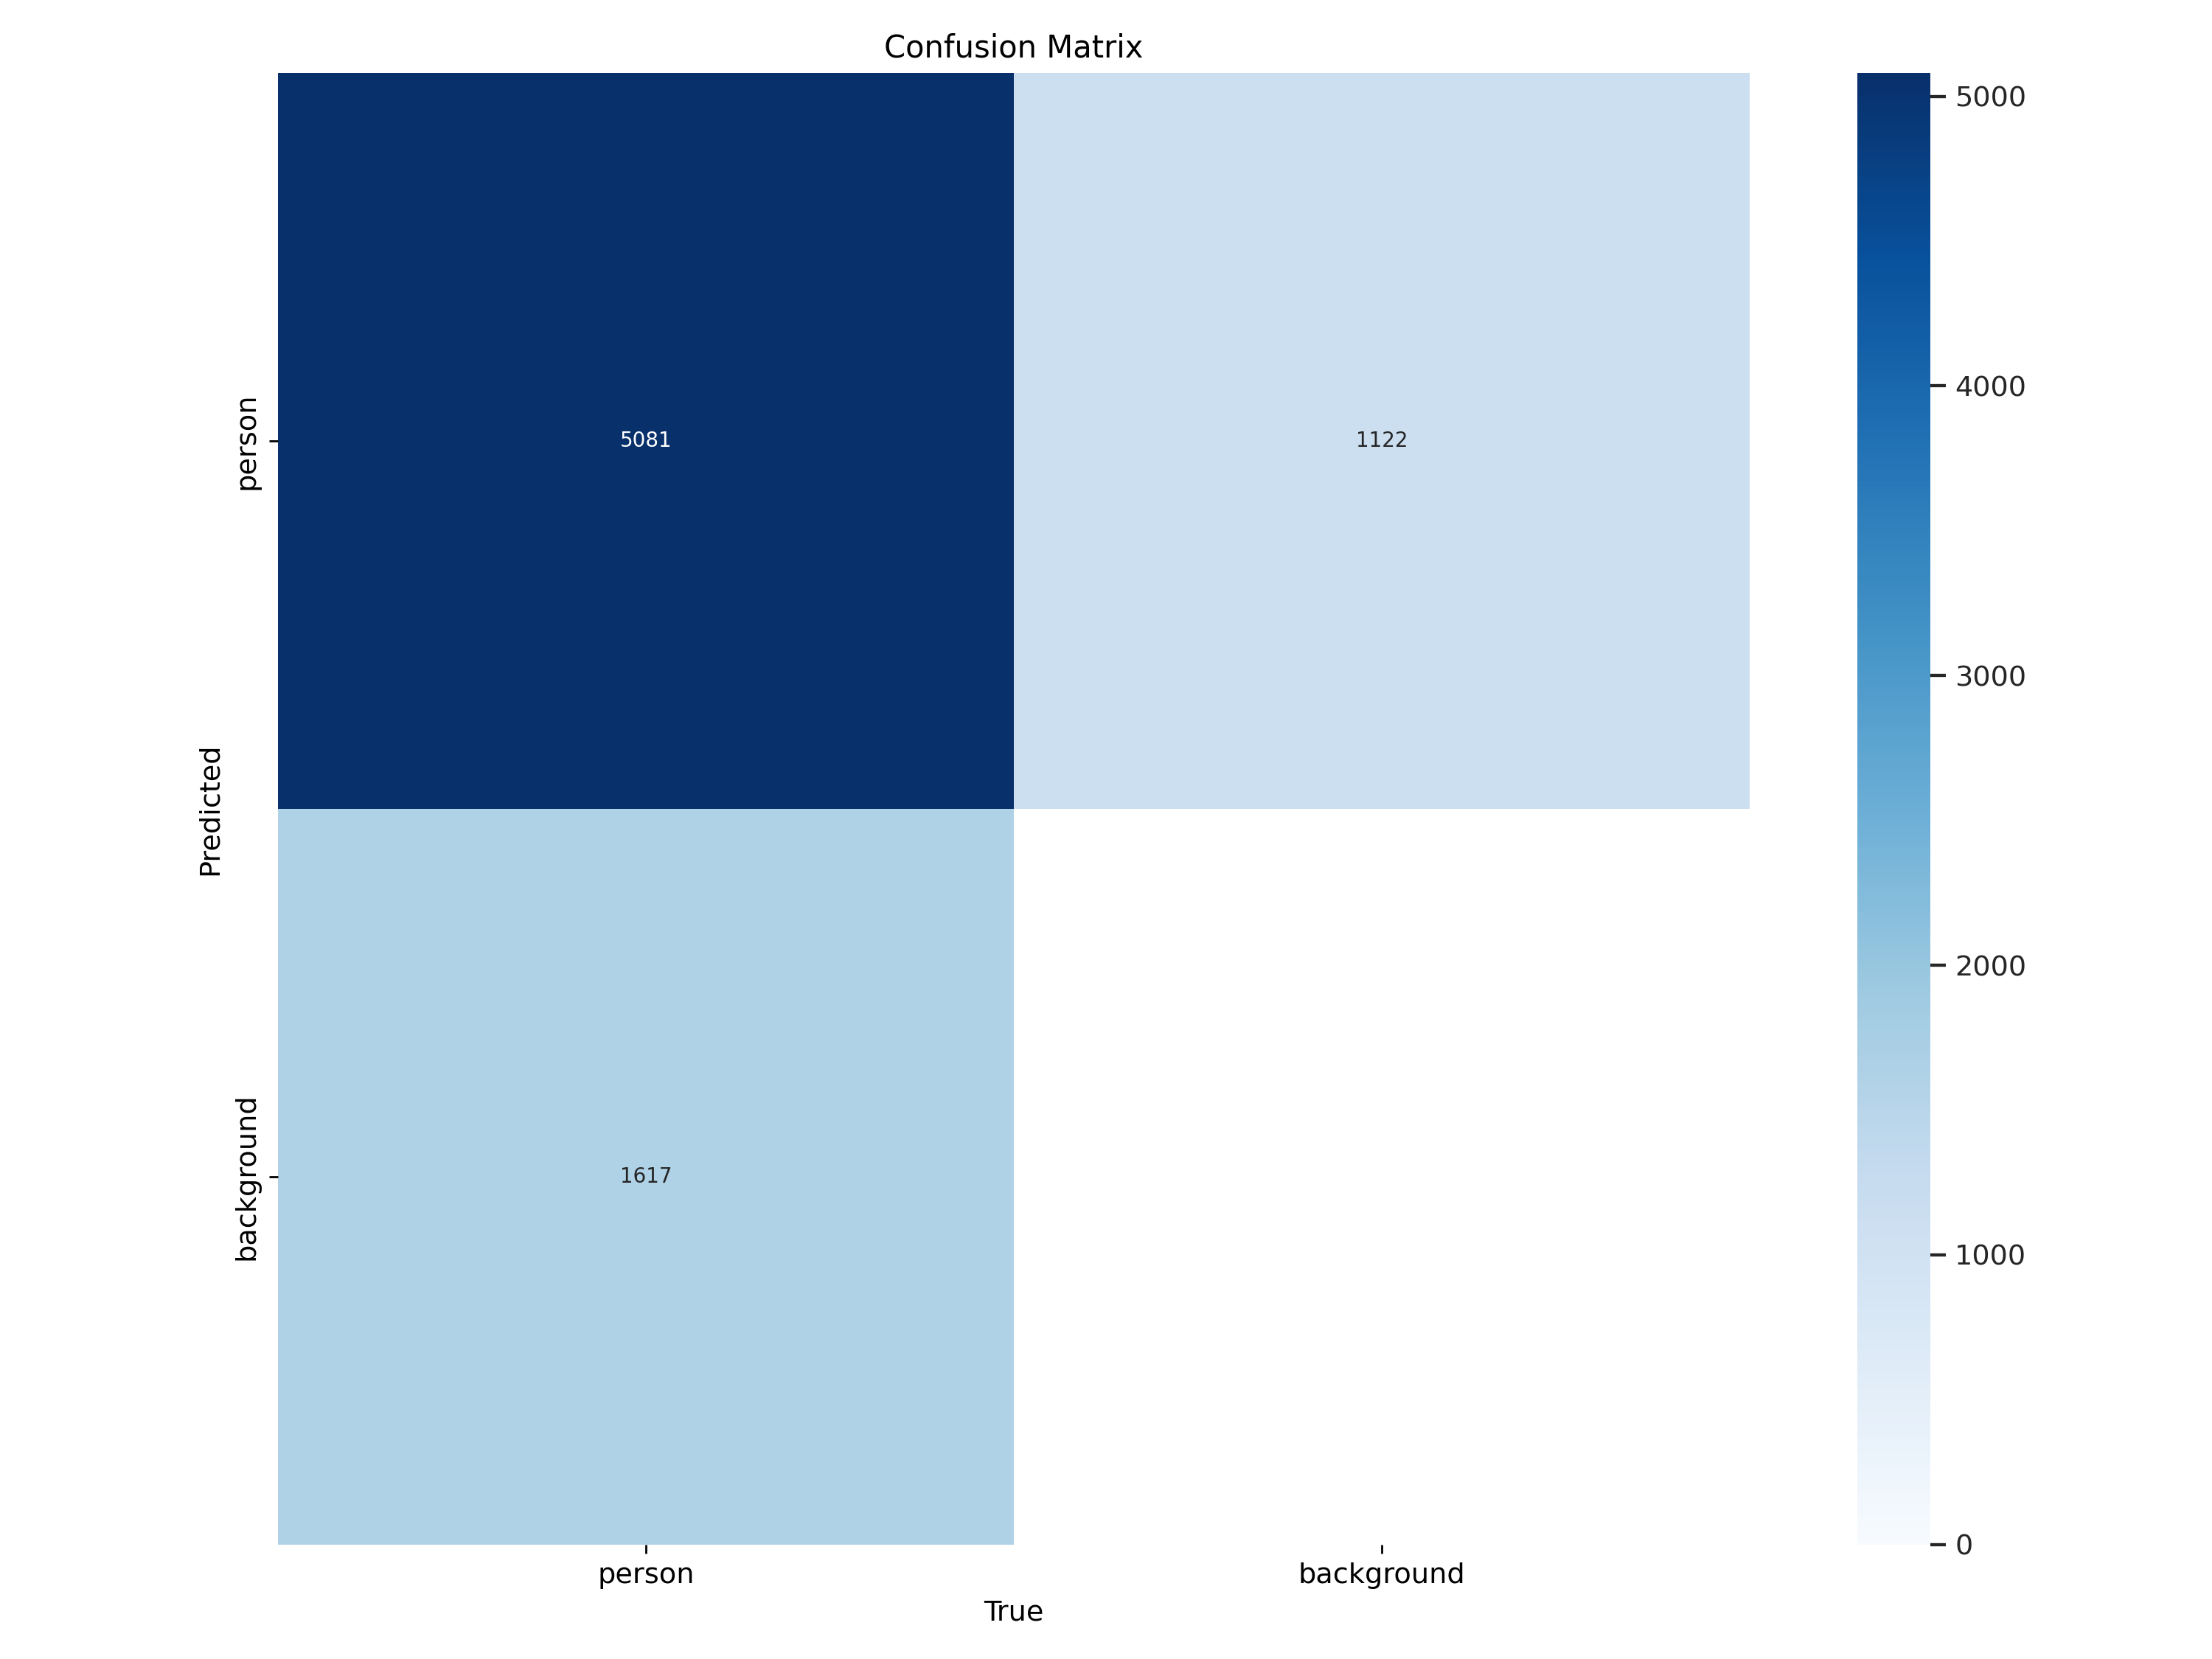

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


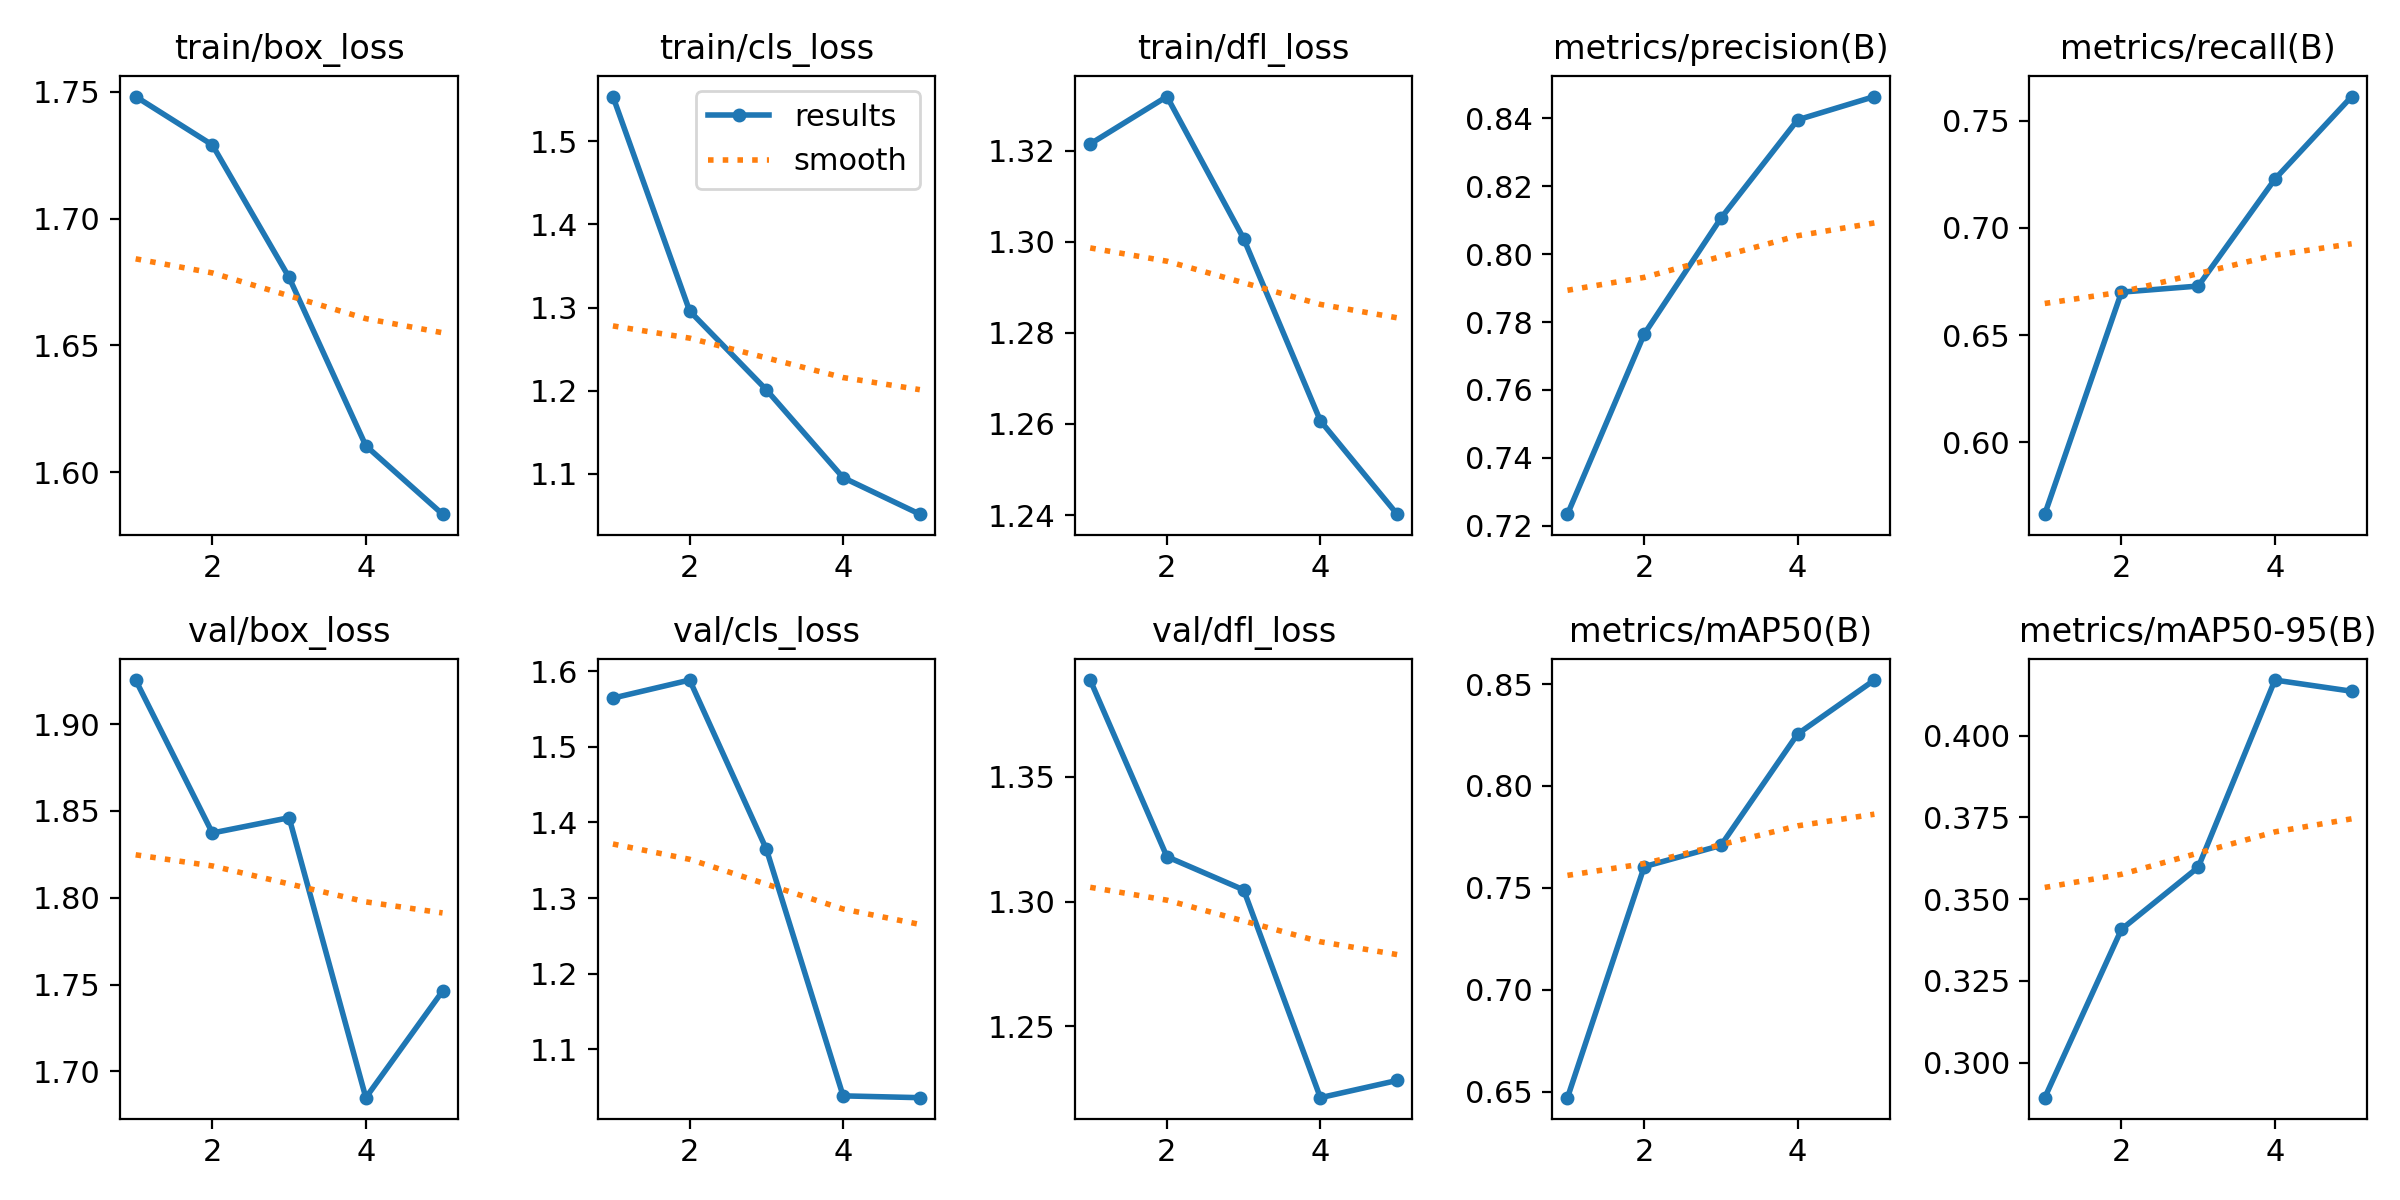

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


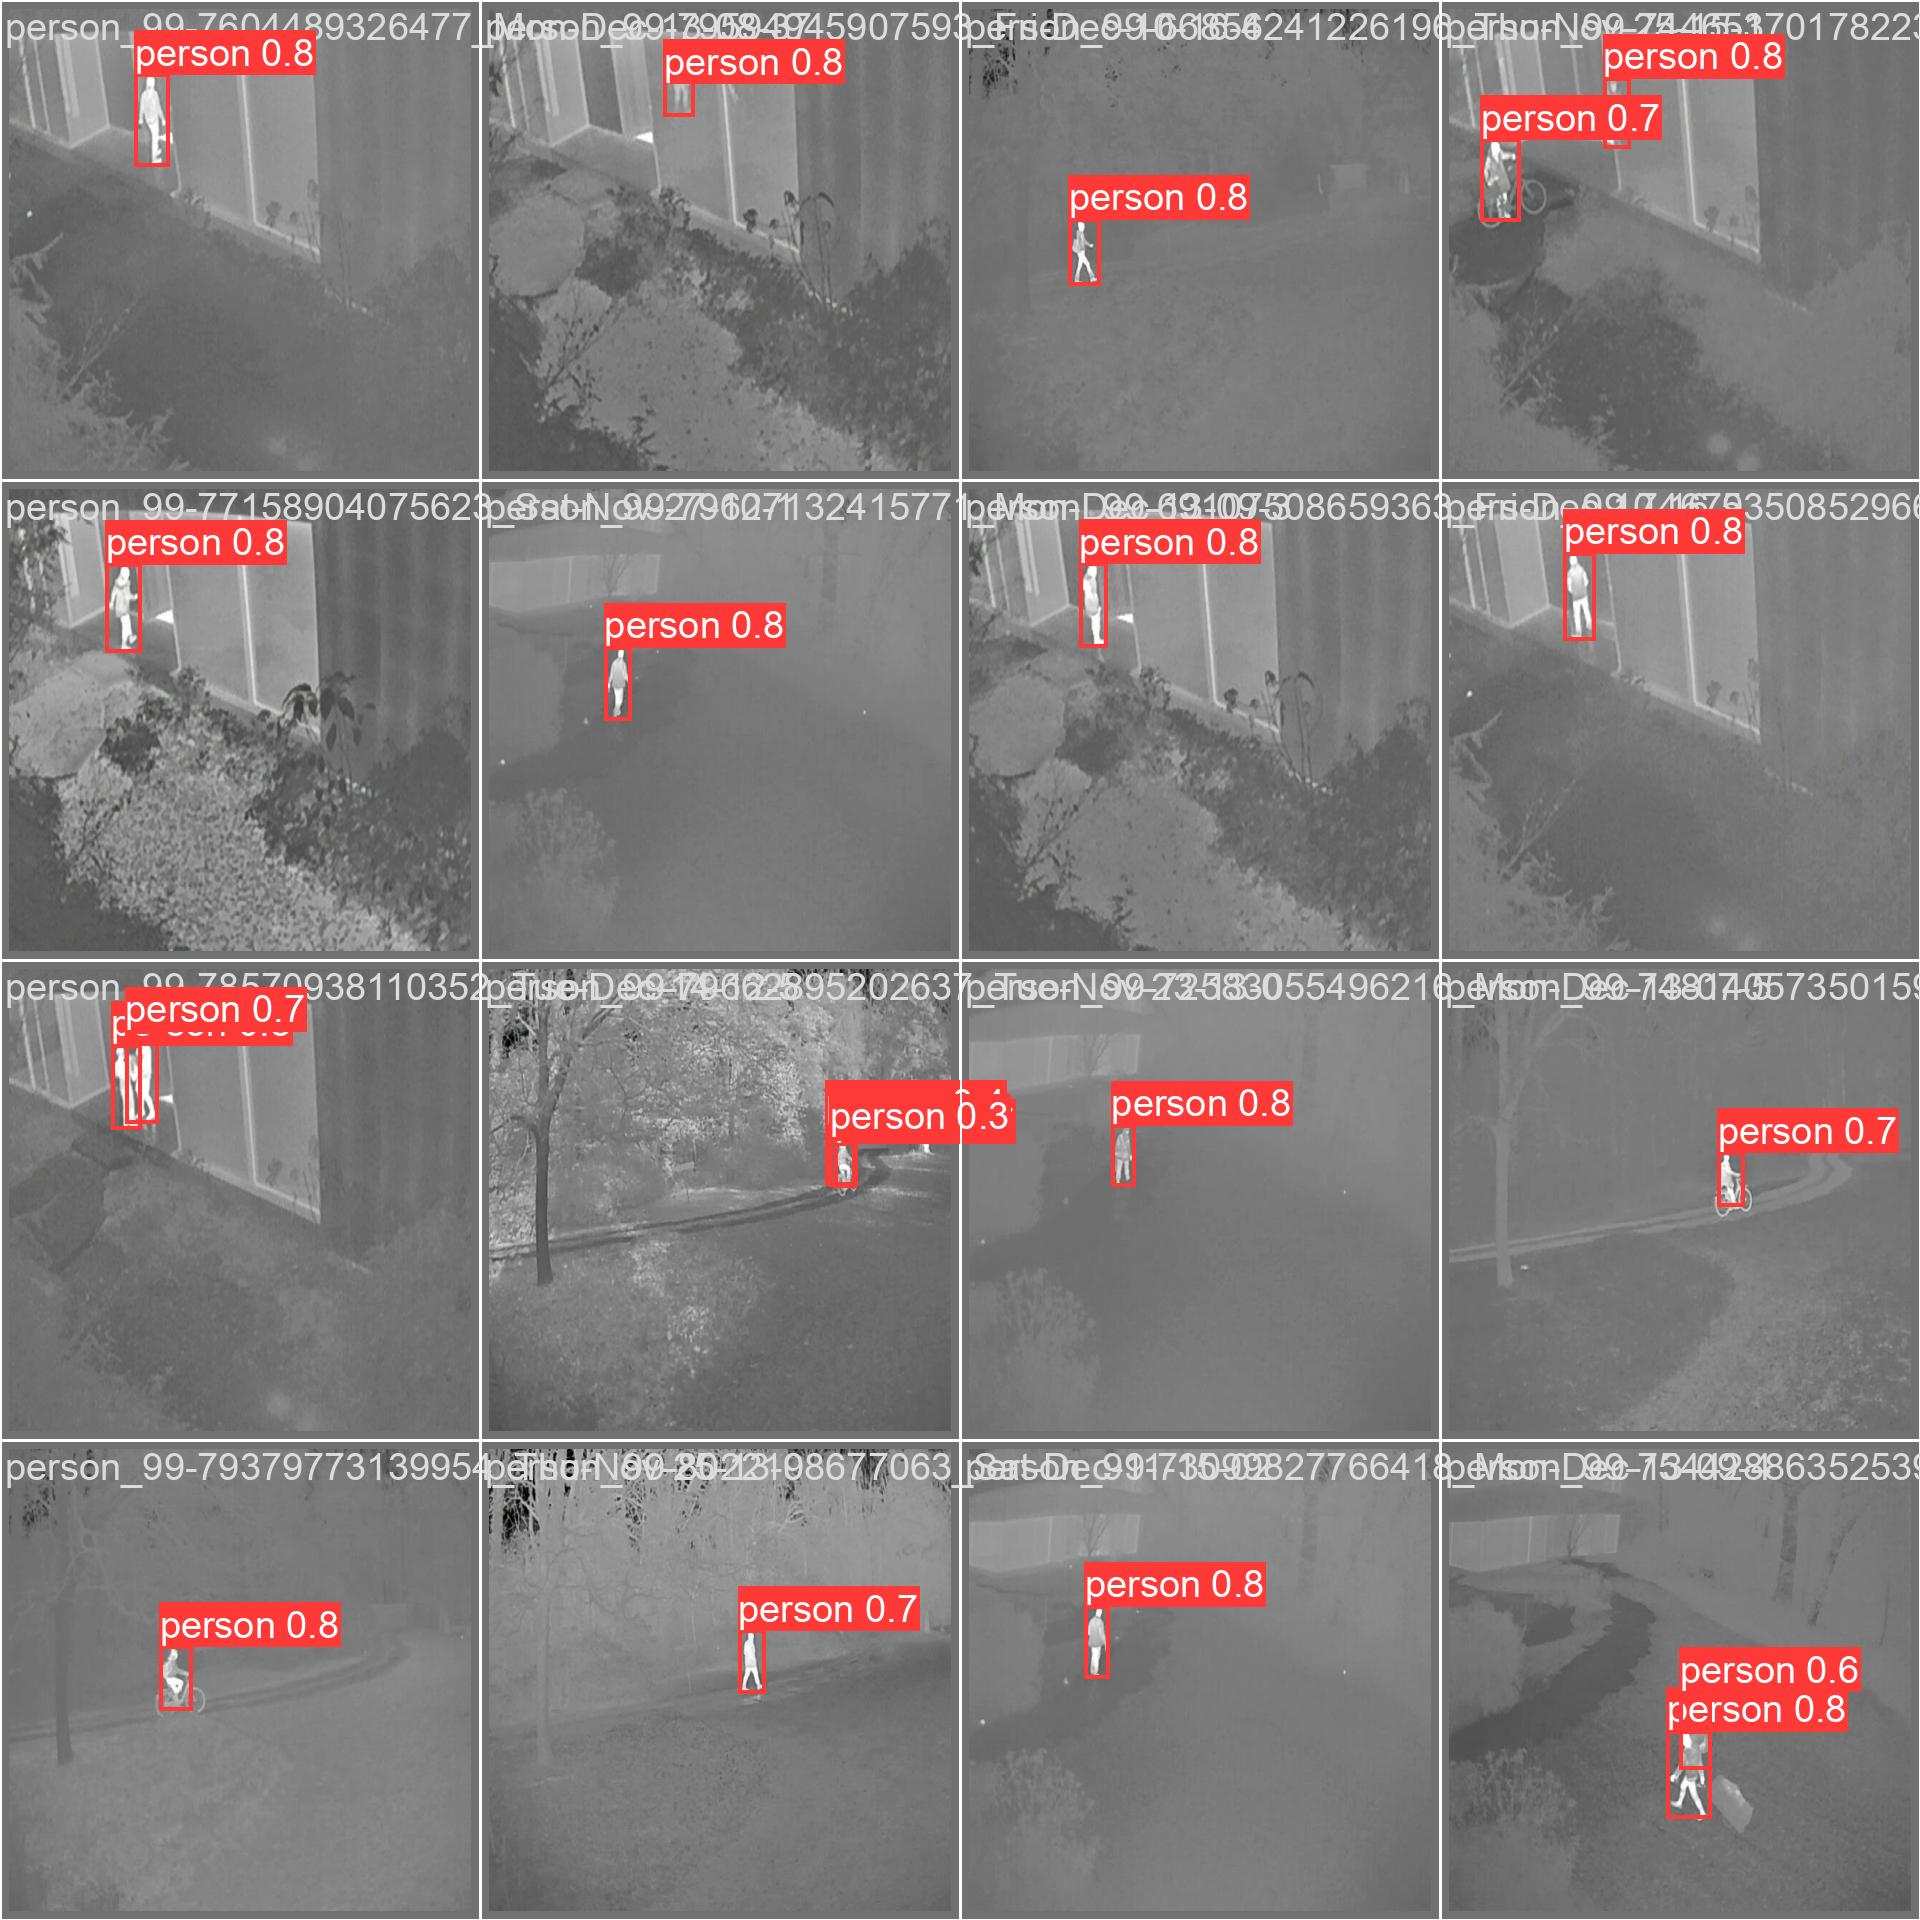

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/People-Detection---Thermal-5/valid/labels.cache... 3061 images, 745 backgrounds, 0 corrupt: 100% 3061/3061 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 192/192 [00:58<00:00,  3.29it/s]
                   all       3061       6698      0.838      0.723      0.825      0.417
Speed: 0.6ms preprocess, 13.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1531 /content/datasets/People-Detection---Thermal-5/test/images/0-751_1663952245-478664_jpg.rf.0b3a02f51d480db6426b6e1e3f021e13.jpg: 800x800 2 persons, 22.5ms
image 2/1531 /content/datasets/People-Detection---Thermal-5/test/images/0-754_1663951434-0043333_jpg.rf.12bc05f6c57fa7bea59e747e8b566c3c.jpg: 800x800 2 persons, 22.5ms
image 3/1531 /content/datasets/People-Detection---Thermal-5/test/images/0-754_1663952386-904586_jpg.rf.1b7cb7e32de2665eccc86ce1af96f7a7.jpg: 800x800 1 person, 22.5ms
image 4/1531 /content/datasets/People-Detection---Thermal-5/test/images/0-754_1664036869-6697836_jpg.rf.51dabb1e0a0f39c69138d119351339a0.jpg: 800x800 (no detections), 22.5ms
image 5/1531 /content/datasets/People-Detection---Thermal-5/test/images/0-755_1663772947-7414863_jpg.rf.431097045ff4d56b176165c5322e1020.jpg: 800x

**NOTE:** Let's take a look at few results.

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [14]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/roboflow-universe-projects/people-detection-thermal/5/uploadModel?api_key=NfzF2rRtPq7irHOQaTvD&modelType=yolov8&nocache=true


In [15]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [16]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on FLIR_05523_jpeg_jpg.rf.d3bf1f695bb49df4546cef8d8b165240.jpg


{'predictions': [{'x': 26.5,
   'y': 333.5,
   'width': 21.0,
   'height': 63.0,
   'confidence': 0.8471361994743347,
   'class': 'person',
   'class_id': 0,
   'detection_id': '756f77e7-7f40-4a10-8079-f7f1fa767031',
   'image_path': '/content/datasets/People-Detection---Thermal-5/test/images/FLIR_05523_jpeg_jpg.rf.d3bf1f695bb49df4546cef8d8b165240.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 139.0,
   'y': 328.5,
   'width': 14.0,
   'height': 45.0,
   'confidence': 0.7152318358421326,
   'class': 'person',
   'class_id': 0,
   'detection_id': 'abdf8d33-4203-4e28-91cd-62660774645f',
   'image_path': '/content/datasets/People-Detection---Thermal-5/test/images/FLIR_05523_jpeg_jpg.rf.d3bf1f695bb49df4546cef8d8b165240.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 490.0,
   'y': 319.0,
   'width': 12.0,
   'height': 30.0,
   'confidence': 0.6563860177993774,
   'class': 'person',
   'class_id': 0,
   'detection_id': '039a36d4-3fef-4a2f-8f41-a1bf88155841',
   'i